In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In this homework, we will use the California Housing Prices data from Kaggle

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

In [2]:
#Load the data
url="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df=pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

Features
For the rest of the homework, you'll need these columns:

* 'latitude'
* 'longitude'
* 'housing_median_age'
* 'total_rooms'
* 'total_bedrooms'
* 'population'
* 'households'
* 'median_income'
* 'median_house_value'
* 'ocean_proximity'


### Data preparation
* Select only the features from above and fill in the missing values with 0.
* Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
* Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
* Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
#Select only the features from above and fill in the missing values with 0
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

#Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms'] / df['households']

#Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

#Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population'] / df['households']


In [6]:
df.shape

(20640, 13)

###  Question 1 : What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN

In [7]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000,20640.000000,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN,NaN,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909,NaN,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874,NaN,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,NaN,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,NaN,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,NaN,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,NaN,6.052381,0.239273,3.282261


In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Ans 1. <1H OCEAN 

### * Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

In [9]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
# Make sure that the target value (median_house_value) is not in your dataframe.
y_train_act = df_train['median_house_value'].values
y_val_act = df_val['median_house_value'].values
y_test_act = df_test['median_house_value'].values

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2 
* Create the correlation matrix for the numerical features of your train dataset.
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
#### What are the two features that have the biggest correlation in this dataset?

options
* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12384 entries, 17244 to 8472
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 12384 non-null  float64
 1   latitude                  12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   ocean_proximity           12384 non-null  object 
 9   rooms_per_household       12384 non-null  float64
 10  bedrooms_per_room         12384 non-null  float64
 11  population_per_household  12384 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.2+ MB


In [12]:
numerical_columns = list(df_train.dtypes[df_train.dtypes == 'float64'].index)
numerical_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [13]:
corr_mat = df_train[numerical_columns].corr()
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values(ascending=False)
print(sorted_mat.index[0], sorted_mat.values[0])

('households', 'total_bedrooms') 0.9793993527694163


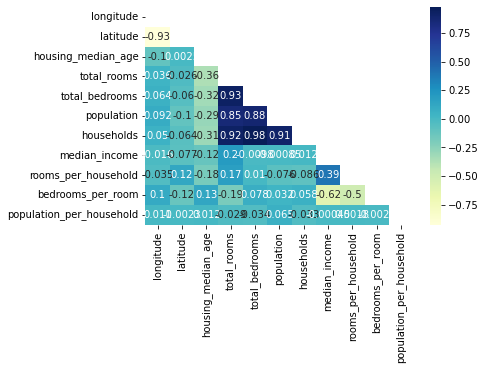

In [14]:
mask = np.triu(np.ones_like(df_train[numerical_columns].corr()))
dataplot = sns.heatmap(df_train[numerical_columns].corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

#### Ans 2. total_bedrooms and households

### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.

Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [15]:
y_train = np.where(y_train > y_train.mean(), 1, 0)
y_val = np.where(y_val > y_val.mean(), 1, 0)
y_test = np.where(y_test > y_test.mean(), 1, 0)


### Question 3 : 
* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

Options:

* 0.263
* 0.00001
* 0.101
* 0.15555

In [16]:
print(mutual_info_score(y_train, df_train['ocean_proximity']))
round(mutual_info_score(y_train, df_train['ocean_proximity']),2)

0.10138385763624205


0.1

#### Ans 3.  0.101

### Question 4
* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* 0.60
* 0.72
* 0.84
* 0.95

In [17]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [18]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [19]:
y_pred = model.predict(X_val)
score = model.score(X_val, y_val)
round(score, 2)

0.84

#### Ans 4. 0.84

### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * total_rooms
    * total_bedrooms
    * population
    * households

note: the difference doesn't have to be positive

In [20]:
# predict on validation data

columns_full =list(df_train.columns)
n = len(columns_full)
pos=0
score_diff_dict ={}
while n>1:
    new=columns_full.copy()   
    del new[pos]
        
    train_dict = df_train[new].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[new].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model.fit(X_train, y_train)
    
    score_pos = model.score(X_val, y_val)
    
    score_diff = score - score_pos
    score_diff_dict[new[pos]] =  round(score_diff, 5)
    n-=1
    pos+=1

score_diff_dict   
    

{'latitude': 0.00412,
 'housing_median_age': 0.00363,
 'total_rooms': 0.00484,
 'total_bedrooms': -0.00024,
 'population': -0.00121,
 'households': 0.00921,
 'median_income': 0.00194,
 'ocean_proximity': 0.05015,
 'rooms_per_household': 0.01623,
 'bedrooms_per_room': 0.00073,
 'population_per_household': -0.00024}

In [21]:
# predict on test data

columns_full =list(df_train.columns)
n = len(columns_full)
pos=0
score_diff_test_dict ={}
while n>1:
    new=columns_full.copy()   
    del new[pos]
        
    train_dict = df_train[new].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    test_dict = df_test[new].to_dict(orient='records')
    X_test = dv.transform(test_dict)
    
    model.fit(X_train, y_train)
    
    score_pos = model.score(X_test, y_test)
    
    score_diff = score - score_pos
    score_diff_test_dict[new[pos]] =  round(score_diff, 5)
    n-=1
    pos+=1

score_diff_test_dict   
    

{'latitude': 0.01405,
 'housing_median_age': 0.00896,
 'total_rooms': 0.01429,
 'total_bedrooms': 0.00339,
 'population': 0.00606,
 'households': 0.01768,
 'median_income': 0.0126,
 'ocean_proximity': 0.06274,
 'rooms_per_household': 0.02059,
 'bedrooms_per_room': 0.00606,
 'population_per_household': 0.00678}

#### Ans 5. total_bedrooms

### Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.
Options:

* 0
* 0.01
* 0.1
* 1
* 10

In [22]:
y_train = np.log1p(y_train_act)
y_val = np.log1p(y_val_act)
y_test = np.log1p(y_test_act)

In [23]:
rmse_dict ={}
for a in [0, 0.01, 0.1, 1, 10]:
    model_Ridge = Ridge(alpha=a, solver="sag", random_state=42)
    model_Ridge.fit(X_train, y_train)
    y_pred = model_Ridge.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_dict[a] =  round(rmse, 3)

rmse_dict

{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}

#### Ans 6. 0